## Classifcation Dataset


In [1]:
import pandas as pd
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('health_lifestyle_dataset.csv')
dataset.head()

,id,age,gender,bmi,daily_steps,sleep_hours,water_intake_l,calories_consumed,smoker,alcohol,resting_hr,systolic_bp,diastolic_bp,cholesterol,family_history,disease_risk
0,1,56,Male,20.5,4198,3.9,3.4,1602,0,0,97,161,111,240,0,0
1,2,69,Female,33.3,14359,9.0,4.7,2346,0,1,68,116,65,207,0,0
2,3,46,Male,31.6,1817,6.6,4.2,1643,0,1,90,123,99,296,0,0
3,4,32,Female,38.2,15772,3.6,2.0,2460,0,0,71,165,95,175,0,0
4,5,60,Female,33.6,6037,3.8,4.0,3756,0,1,98,139,61,294,0,0


In [3]:
dataset.isnull().sum()

id                   0
age                  0
gender               0
bmi                  0
daily_steps          0
sleep_hours          0
water_intake_l       0
calories_consumed    0
smoker               0
alcohol              0
resting_hr           0
systolic_bp          0
diastolic_bp         0
cholesterol          0
family_history       0
disease_risk         0
dtype: int64

In [4]:
dataset['disease_risk'].value_counts()

disease_risk
0    75179
1    24821
Name: count, dtype: int64

In [5]:
dataset['family_history'].value_counts()

family_history
0    70085
1    29915
Name: count, dtype: int64

In [6]:
dataset.columns

Index(['id', 'age', 'gender', 'bmi', 'daily_steps', 'sleep_hours',
       'water_intake_l', 'calories_consumed', 'smoker', 'alcohol',
       'resting_hr', 'systolic_bp', 'diastolic_bp', 'cholesterol',
       'family_history', 'disease_risk'],
      dtype='object')

In [7]:
# Dependent and independe features
x = dataset[['bmi', 'daily_steps', 'sleep_hours',
       'water_intake_l', 'calories_consumed', 'smoker', 'alcohol',
       'resting_hr', 'systolic_bp', 'diastolic_bp', 'cholesterol',
       'family_history']]
y = dataset['disease_risk']

In [8]:
# let's split the train and test data 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=30)

<Axes: >

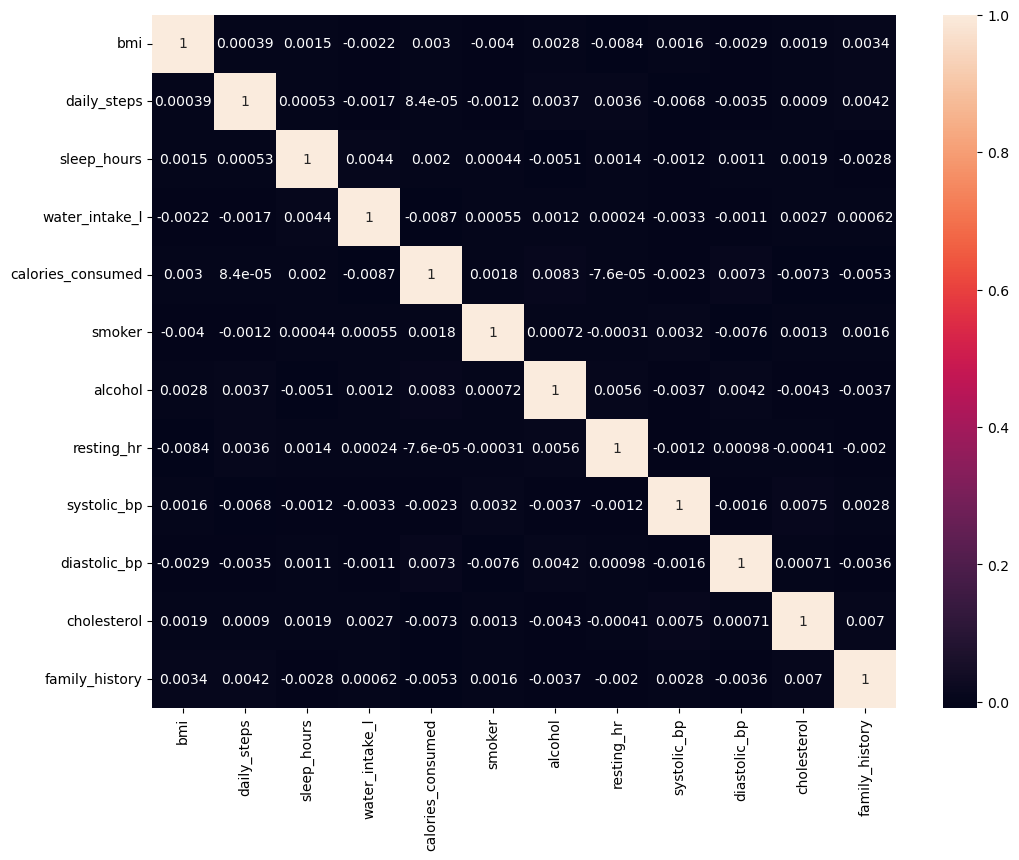

In [9]:
# feature selection
plt.figure(figsize=(12,9))
sns.heatmap(x_train.corr(),annot=True)

In [10]:
# scaled the data
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

In [11]:
x_train_scaled = scalar.fit_transform(x_train)
x_test_scaled = scalar.fit_transform(x_test)

In [12]:
pd.DataFrame(x_train_scaled)

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.116168,0.291588,-0.294973,1.578816,0.337787,-0.501054,-0.654186,-0.932325,-0.406449,0.547662,1.402011,-0.652122
1,-0.600323,1.523483,-0.789162,0.115875,-0.908991,-0.501054,-0.654186,-1.556449,-1.331376,-0.778766,0.155880,-0.652122
2,-0.017661,0.585105,-0.047879,-1.655054,1.634090,-0.501054,1.528617,-0.793630,0.171631,0.720674,-0.190268,-0.652122
3,0.659487,-1.414423,-1.382189,1.501819,-0.965944,-0.501054,-0.654186,0.940048,-1.138683,-0.778766,-0.928716,-0.652122
4,-0.899528,-1.050673,0.545148,-1.270070,-0.328316,1.995791,1.528617,0.940048,-0.367910,-0.317400,-0.397956,-0.652122
...,...,...,...,...,...,...,...,...,...,...,...,...
79995,-1.639666,-1.109048,1.385269,-0.192113,0.499980,-0.501054,-0.654186,-0.100159,1.636099,-0.951778,-0.697951,-0.652122
79996,-1.545180,0.747643,-0.789162,1.039838,-1.375759,-0.501054,-0.654186,-1.556449,-1.023067,-1.355474,-1.551782,-0.652122
79997,-0.978266,-0.126341,-0.739743,1.116834,1.653900,-0.501054,1.528617,0.177230,-0.522065,-0.778766,0.132803,-0.652122
79998,-0.600323,-0.302378,-1.184513,1.732810,-0.670035,-0.501054,-0.654186,-0.169506,-0.213756,0.547662,-0.721027,-0.652122


## Logistic regression

In [13]:
# Model trainig to the logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
logistic_regression = LogisticRegression()
logistic_regression.fit(x_train_scaled,y_train)
y_pred = logistic_regression.predict(x_test)
conf_metrix = confusion_matrix(y_test,y_pred)
report = classification_report(y_test,y_pred)

print(conf_metrix)
print(report)
# Here Logistic regressiom model is performing the descent like accuracy is around 74%
# But still we can improve the performace of mode using hyperparameter tuning and cross validation

[[14732   283]
 [ 4913    72]]
              precision    recall  f1-score   support

           0       0.75      0.98      0.85     15015
           1       0.20      0.01      0.03      4985

    accuracy                           0.74     20000
   macro avg       0.48      0.50      0.44     20000
weighted avg       0.61      0.74      0.64     20000



/Users/bhaskarrai/Desktop/100-days-/day_69/env/lib/python3.12/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


## Hyperparameter Tuning and Cross Validation

In [14]:
model = LogisticRegression() # selecting model
"""
        penalty="l2",
        dual=False,
        tol=1e-4,
        C=1.0,
        fit_intercept=True,
        intercept_scaling=1,
        class_weight=None,
        random_state=None,
        solver="lbfgs",
        max_iter=100,
        multi_class="deprecated",
        verbose=0,
        warm_start=False,
        n_jobs=None,
        l1_ratio=None,

        This are the parameter which are updating during the hyperparamter tuning 
        but here is the few parameter we are working on 
"""
params = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    # L1 Lasso regression L2 ridge regression
    'C':[1.0,10.0,0.1,0.01,0.10,100.0],
    # Inverse of regularization strength: It mean higher the C value lower the lamda value in regularization
    'solver':['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
    # this all parameters have its own function according to the dataset like multiclass,large or small dataest
}

In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix
# estimator is which model is we are using
grid_search_cv =  GridSearchCV(estimator=model,param_grid=params,cv=5,scoring='accuracy')
grid_search_cv.fit(x_train_scaled,y_train)
y_pred = grid_search_cv.predict(x_test)
report = classification_report(y_test,y_pred)
conf_met = confusion_matrix(y_test,y_pred)
print(conf_met)
print(report)
# this model is also porducing the decent result 

[[14734   281]
 [ 4913    72]]
              precision    recall  f1-score   support

           0       0.75      0.98      0.85     15015
           1       0.20      0.01      0.03      4985

    accuracy                           0.74     20000
   macro avg       0.48      0.50      0.44     20000
weighted avg       0.61      0.74      0.64     20000



/Users/bhaskarrai/Desktop/100-days-/day_69/env/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:516: FitFailedWarning: 
300 fits failed out of a total of 540.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/bhaskarrai/Desktop/100-days-/day_69/env/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bhaskarrai/Desktop/100-days-/day_69/env/lib/python3.12/site-packages/sklearn/base.py", line 1365, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/bha

## Balancing dataset
This dataset have imbalance dataset 
let's work on new model and make it model balance dataset

In [16]:
# Dependent and independe features
x = dataset[['bmi', 'daily_steps', 'sleep_hours',
       'water_intake_l', 'calories_consumed', 'smoker', 'alcohol',
       'resting_hr', 'systolic_bp', 'diastolic_bp', 'cholesterol',
       'family_history']]
y = dataset['disease_risk']

In [17]:
# let's split the train and test data 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=30)

In [18]:
# scaled the data
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
x_train_scaled = scalar.fit_transform(x_train)
x_test_scaled = scalar.fit_transform(x_test)

In [19]:
y.value_counts()

disease_risk
0    75179
1    24821
Name: count, dtype: int64

In [20]:
# here we can see that data is totally imbalance dataset
model_logistic = LogisticRegression()
params = {
    'penalty': ['l1', 'l2'],
    # L1 Lasso regression L2 ridge regression
    'C':[1.0,0.01,100.0],
    # Inverse of regularization strength: It mean higher the C value lower the lamda value in regularization
    'solver':['liblinear','saga'],
    # this all parameters have its own function according to the dataset like multiclass,large or small dataest
    'class_weight':[{0:1, 1:10} ]
    # class weight helps to handle the imbalance dataset
    # 0    75179
    # 1    24821 here we can see that 0 has high number then 1 so this data is imbalance 
}


In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix
# estimator is which model is we are using
grid_search_cv =  GridSearchCV(estimator=model_logistic,param_grid=params,cv=5,scoring='accuracy')
grid_search_cv.fit(x_train_scaled,y_train)
y_pred = grid_search_cv.predict(x_test)
report = classification_report(y_test,y_pred)
conf_met = confusion_matrix(y_test,y_pred)
print(conf_met)
print(report)
# this model is also porducing the decent result 

/Users/bhaskarrai/Desktop/100-days-/day_69/env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/bhaskarrai/Desktop/100-days-/day_69/env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/bhaskarrai/Desktop/100-days-/day_69/env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/bhaskarrai/Desktop/100-days-/day_69/env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/bhaskarrai/Desktop/100-days-/day_69/env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached w

[[14494   521]
 [ 4843   142]]
              precision    recall  f1-score   support

           0       0.75      0.97      0.84     15015
           1       0.21      0.03      0.05      4985

    accuracy                           0.73     20000
   macro avg       0.48      0.50      0.45     20000
weighted avg       0.62      0.73      0.65     20000



/Users/bhaskarrai/Desktop/100-days-/day_69/env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/bhaskarrai/Desktop/100-days-/day_69/env/lib/python3.12/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
